In [2]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/ericmjl/anaconda/envs/bayesian-modelling-tutorial/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [22]:
df = pd.read_csv('../data/baseballdb/core/Batting.csv')
df['AB'] = df['AB'].replace(0, np.nan)
df = df.dropna()
df['batting_avg'] = df['H'] / df['AB']
df = df[df['yearID'] >= 2016]
df = df.iloc[0:15]
df.head(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,batting_avg
101333,abadfe01,2016,1,MIN,AL,39,1.0,0,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
101335,abreujo02,2016,1,CHA,AL,159,624.0,67,183,32,...,0.0,2.0,47,125.0,7.0,15.0,0.0,9.0,21.0,0.293269
101337,ackledu01,2016,1,NYA,AL,28,61.0,6,9,0,...,0.0,0.0,8,9.0,0.0,0.0,0.0,1.0,0.0,0.147541
101338,adamecr01,2016,1,COL,NL,121,225.0,25,49,7,...,2.0,3.0,24,47.0,0.0,4.0,3.0,0.0,5.0,0.217778
101340,adamsma01,2016,1,SLN,NL,118,297.0,37,74,18,...,0.0,1.0,25,81.0,1.0,2.0,0.0,3.0,5.0,0.249158


In [23]:
df

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,batting_avg
101333,abadfe01,2016,1,MIN,AL,39,1.0,0,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
101335,abreujo02,2016,1,CHA,AL,159,624.0,67,183,32,...,0.0,2.0,47,125.0,7.0,15.0,0.0,9.0,21.0,0.293269
101337,ackledu01,2016,1,NYA,AL,28,61.0,6,9,0,...,0.0,0.0,8,9.0,0.0,0.0,0.0,1.0,0.0,0.147541
101338,adamecr01,2016,1,COL,NL,121,225.0,25,49,7,...,2.0,3.0,24,47.0,0.0,4.0,3.0,0.0,5.0,0.217778
101340,adamsma01,2016,1,SLN,NL,118,297.0,37,74,18,...,0.0,1.0,25,81.0,1.0,2.0,0.0,3.0,5.0,0.249158
101341,adlemti01,2016,1,CIN,NL,13,21.0,2,4,2,...,0.0,0.0,0,11.0,0.0,0.0,2.0,0.0,0.0,0.190476
101342,adriaeh01,2016,1,SFN,NL,40,63.0,3,16,2,...,0.0,1.0,2,13.0,0.0,2.0,4.0,0.0,0.0,0.253968
101343,aguilje01,2016,1,CLE,AL,9,6.0,0,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
101344,ahmedni01,2016,1,ARI,NL,90,284.0,26,62,9,...,5.0,2.0,15,58.0,3.0,4.0,2.0,3.0,9.0,0.218310
101346,alberha01,2016,1,TEX,AL,35,56.0,2,8,1,...,1.0,0.0,0,17.0,0.0,0.0,2.0,0.0,1.0,0.142857


In [24]:
import theano.tensor as tt

with pm.Model() as baseball_model:
    
    phi = pm.Uniform('phi', lower=0.0, upper=1.0)
    kappa_log = pm.Exponential('kappa_log', lam=1.5)
    kappa = pm.Deterministic('kappa', tt.exp(kappa_log))

    thetas = pm.Beta('thetas', alpha=phi*kappa, beta=(1.0-phi)*kappa, shape=len(df))
    like = pm.Binomial('like', n=df['AB'], p=thetas, observed=df['H'])

In [25]:
with baseball_model:
    trace = pm.sample(2000, init='advi')

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 58.371:   6%|▌         | 11501/200000 [00:14<03:53, 806.54it/s]
Convergence archived at 11600
Interrupted at 11,599 [5%]: Average Loss = 632.41
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [thetas_logodds__, kappa_log_log__, phi_interval__]
100%|██████████| 2500/2500 [00:10<00:00, 236.54it/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1b8f8d30>,
      dtype=object)

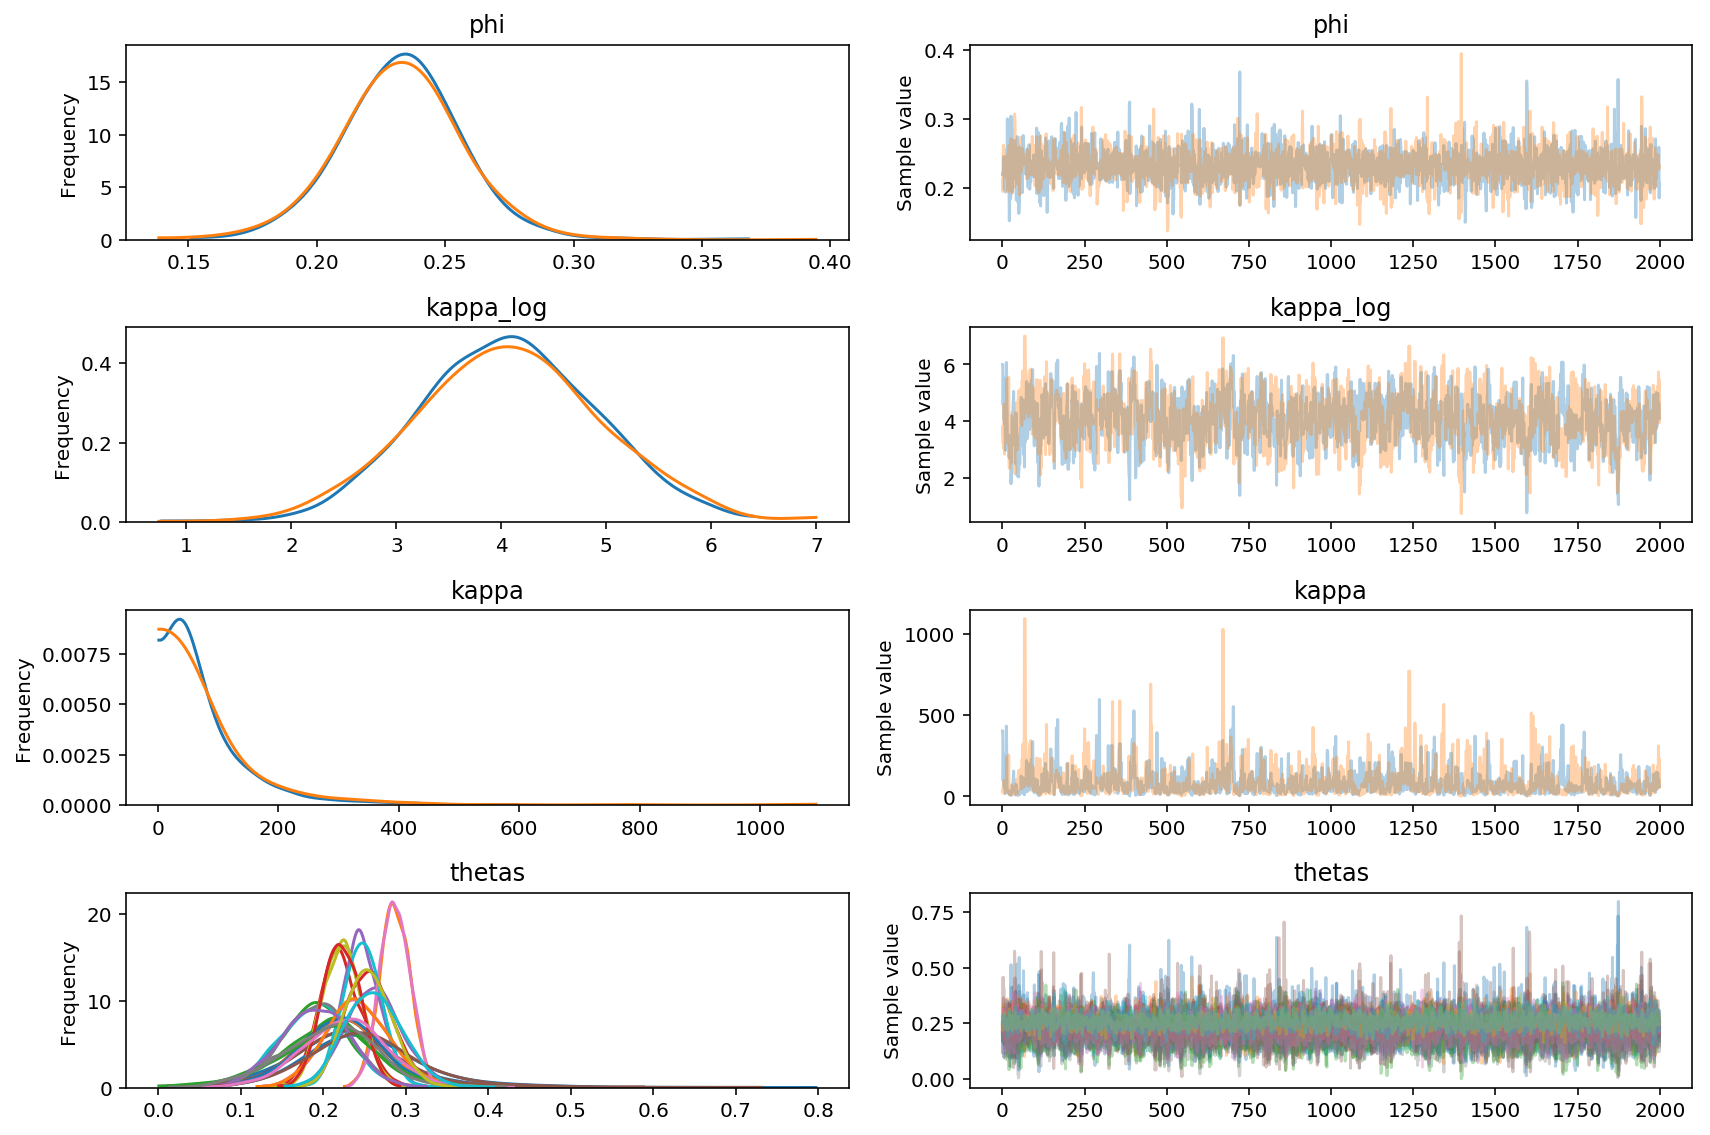

In [26]:
pm.traceplot(trace)

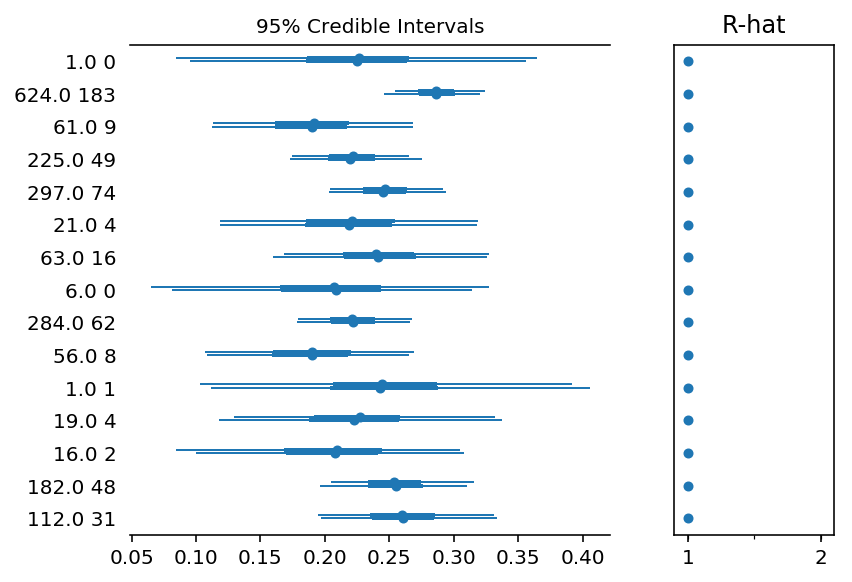

In [32]:
ylabels = df['AB'].astype(str) + ' ' + df['H'].astype('str')
pm.forestplot(trace, varnames=['thetas'], ylabels=ylabels)